# Final Project

![stroke_image](stroke_image.png)

## 1. Thu nhập dữ liệu:

Hôm nay, chúng ta sẽ tìm hiểu về 1 căn bệnh nằm trong top 10 căn bệnh gây tử vong hàng đầu đó chính là đột quỵ và các yếu tố ảnh hưởng đến đột quỵ. Từ đó có thể dự đoán sớm những người có nguy cơ mắc phải cũng như tìm ra điểm chung của những người này để có các biện pháp ngăn ngừa giúp giảm nguy cơ đột quỵ.

Đột quỵ là gì?

- Đột quỵ (tai biến mạch máu não) là tình trạng não bộ bị tổn thương nghiêm trọng, xảy ra khi dòng máu cung cấp cho não bị gián đoạn hoặc có một mạch máu trong não bị vỡ. Khi đó, lượng oxy và dinh dưỡng nuôi các tế bào não bị giảm đáng kể. Trong vòng vài phút, các tế bào não bắt đầu chết dần và gây ra nhiều biến chứng nguy hiểm đến tính mạng người bệnh. 
- Theo [thống kê của WHO](https://www.who.int/en/news-room/fact-sheets/detail/the-top-10-causes-of-death), đột quỵ đứng thứ 2 trong top 10 căn bệnh gây tử vong nhiều nhất. Nó gây ra cái chết của hơn 6 triệu người, chiếm hơn 11% tổng số ca tử vong trong cùng 1 năm. 

Dữ liệu được lấy từ [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) trên kaggle của tác giả [fedesoriano](https://www.kaggle.com/fedesoriano).

Với dữ liệu này, tác giả cho phép chúng ta sử dụng cho mục đích học tập. Còn nếu sử dụng cho mục đích khác như nghiên cứu, thì phải ghi nguồn tác giả. 

## 2. Khám phá dữ liệu:

Đầu tiên ta sẽ đọc dữ liệu từ file

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

Ta sẽ xem thử vài dòng đầu để có cái nhìn khái quát về dữ liệu.

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
df.shape

(5110, 12)

Dữ liệu có 5110 dòng và 12 cột.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng biểu diễn cho thông tin liên quan của mỗi một bệnh nhân. Nhìn thì ta có thể thấy các dòng không có gì bất thường

### Ý nghĩa của mỗi cột:
- id: Mã định danh của mỗi người
- gender: Giới tính ("Male", "Female", "Other")
- age: Tuổi của bệnh nhân
- hypertension: Bệnh nhân có bị cao huyết áp không (0: Không, 1: Có)
- heart_disease: Bệnh nhân có bị bệnh tim không (0: Không, 1: Có)
- ever_married: Đã kết hôn chưa ("No","Yes")
- work_type: Loại công việc ("Children", "Govt_jov", "Never_worked", "Private" or "Self-employed")
- Residence_type: Khu vực cư trú ("Rural": Nông thôn, "Urban": Đô thị)
- avg_glucose_level: Nồng độ đường trong máu
- bmi: Chỉ số bmi của cơ thể
- smoking_status: Tình trạng hút thuốc ("formerly smoked": Trước đây có hút thuốc nhưng giờ bỏ rồi, "never smoked": Chưa bao giờ hút, "smokes": Hút thuốc, "Unknown": Không có thông tin)
- stroke: Bệnh nhân có bị đột quỵ không (0: Không, 1: Có)

### Dữ liệu có các dòng bị lặp không?

In [4]:
have_duplicated_rows=any(df.duplicated())
have_duplicated_rows

False

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Ta thấy có vẻ cột age hơi bất thường vì tuổi phải là 1 số nguyên, không thể là kiểu float được. còn lại thì các cột khác đều có kiểu dữ liệu phù hợp.

Tí nữa ta sẽ tiền xử lý cột age ngay dưới đây

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Hiện có vẻ có 7 cột thuộc nhóm numeric là: "id","age","hypertension","heart_disease","avg_glucose_level","bmi" và "stroke". Tuy nhiên, 4 cột "id","hypertension","heart_disease" và "stroke" thật ra là dạng categorical( vì là mã được đánh dưới dạng số). Như vậy chỉ có 3 cột thuộc numeric là "age","avg_glucose_level" và "bmi"

Với mỗi cột ta sẽ tính tỉ lệ % giá trị thiếu, min và max và lưu vào dataframe nume_col_profiles_df.

In [6]:
def missing_ratio(s):
    return s.isna().mean()*100
nume_col_profiles_df=df[["age","avg_glucose_level","bmi"]].agg([missing_ratio,min,max])
nume_col_profiles_df

,age,avg_glucose_level,bmi
missing_ratio,0.00,0.00,3.933464
min,0.08,55.12,10.300000
max,82.00,271.74,97.600000


Ta thấy rằng các cột "age" và "avg_glucose_level" đều có đủ giá trị, chỉ có cột "bmi" là thiếu gần 4% giá trị. Còn min max chỉ có 1 điểm bất thường là min của cột age là 0.08 (tuổi không thể là số thực như vậy được)

Giờ ta đã xuất hiện 1 vấn đề cần tiền xử lý đó là cột age xuất hiện những giá trị số thực. 

---

## Tiền xử lý

Theo như tìm hiểu thì các giá trị age là số thực đều là của những đứa trẻ dưới 3 tuổi. Vì còn nhỏ tuổi, nên người ta tính thêm cả tháng tuổi từ đó dẫn đến số tuổi không nguyên. 1 cách để tiền xử lý là ta có thể làm tròn số tuổi của những đứa trẻ này lên, rồi sau đó ta sẽ đổi kiểu dữ liệu của cột age này về kiểu int.

In [7]:
df['age']=df['age'].apply(math.ceil)
df['age']=df['age'].astype("int")

### Giờ ta sẽ xem lại thử kiểu dữ liệu cột age đã là "int" và các giá trị phân bố trong age đúng chưa?

In [8]:
df.dtypes

id                     int64
gender                object
age                    int32
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
nume_col_profiles_df=df[["age","avg_glucose_level","bmi"]].agg([missing_ratio,min,max])
nume_col_profiles_df

,age,avg_glucose_level,bmi
missing_ratio,0.0,0.00,3.933464
min,1.0,55.12,10.300000
max,82.0,271.74,97.600000


Nhìn qua thì ta thấy mọi thứ đã ổn

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

df có 9 cột kiểu categorical là: "id","hypertension","heart_disease","stroke","gender","work_type","ever_married","smoking_status" và "Residence_type".

Ở mỗi cột categorical, ta sẽ tính tỉ lệ % giá trị thiếu, số lượng khác nhau và show ra các giá trị khác nhau (không tính giá trị thiếu).

In [10]:
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.dropna().unique()
cate_df=df[["id","hypertension","heart_disease","stroke","gender","work_type","Residence_type","ever_married","smoking_status"]]
cate_col_profiles_df=cate_df.agg([missing_ratio,num_diff_vals,diff_vals])
cate_col_profiles_df

,id,hypertension,heart_disease,stroke,gender,work_type,Residence_type,ever_married,smoking_status
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,5110,2,2,2,3,5,2,2,4
diff_vals,"[9046, 51676, 31112, 60182, 1665, 56669, 53882...","[0, 1]","[1, 0]","[1, 0]","[Male, Female, Other]","[Private, Self-employed, Govt_job, children, N...","[Urban, Rural]","[Yes, No]","[formerly smoked, never smoked, smokes, Unknown]"


*Ta có thể thấy không có cột nào thiếu giá trị. Số lượng giá trị khác nhau và các giá trị khác nhau cũng không có gì bất thường*

## 3. Đưa ra các câu hỏi có ý nghĩa cần trả lời

---

- Ở mỗi giới tính thì chỉ số bmi (người gầy, bình thường, thừa cân hay béo phì các cấp độ) có tỉ lệ trung bình bị đột quy như thế nào?  

Trả lời được câu hỏi này: Ta sẽ có thể biết được ở mỗi giới tính người nào dễ có nguy cơ bị đột quỵ nhất. Từ đó có thể dự đoán sớm nhóm người nguy cơ
mắc cao để báo trước cho những người này cần phải điều chỉnh chế độ ăn uống, sinh hoạt hàng ngày giúp cải thiện chỉ số bmi nhằm ngăn ngừa khả năng bị
đột quỵ.

- Những người có tiền sử bệnh khác(huyết áp cao, tim mạch, đái tháo đường) thì có tổng số ca bị đột quỵ theo từng độ tuổi là bao nhiêu?

Chúng ta đều biết những người càng lớn tuổi thì khả năng bị đột quỵ càng cao, vậy nếu họ còn mang thêm những căn bệnh nguy hiểm khác thì sẽ thế nào? Trả lời được câu hỏi này giúp dự báo trước nguy cơ bị đột quỵ của những nhóm người này và họ sẽ cần tìm những sự tư vấn, chăm sóc phù hợp để giảm khả năng bị đột quỵ thấp nhất có thể.

## 4. Tiền xử lý + phân tích dữ liệu để trả lời cho từng câu hỏi

---

### Ở mỗi giới tính thì chỉ số bmi (người gầy, bình thường, thừa cân hay béo phì các cấp độ) có tỉ lệ trung bình bị đột quy như thế nào?

Để trả lời câu hỏi này ta cần phải tiền xử lý dữ liệu:

- Vì số lượng giá trị Other trong giới tính rất nhỏ nên ta sẽ bỏ qua, chỉ lấy dữ liệu có giới tính nam và nữ 

- Ở quá trình khám phá dữ liệu ta thấy cột bmi thiếu giá trị nên ta loại bỏ những dòng mà thiếu giá trị đó.

- Ta chia chỉ số bmi thành 6 nhóm theo [chuẩn của tổ chức WHO](https://www.euro.who.int/en/health-topics/disease-prevention/nutrition/a-healthy-lifestyle/body-mass-index-bmi)

  - 1. Dưới 18.5: Gầy
  - 2. Từ 18-5->24.9: Bình thường
  - 3. Từ 25.0->29.9: Tiền béo phì
  - 4. Từ 30->34.9: Béo phì cấp độ 1
  - 5. Từ 35->39.9: Béo phì cấp độ 2
  - 6. Trên 40: Béo phì cấp độ 3

### Tiền xử lý

#### Bỏ các dòng có giá trị 'Other' trong gender

In [11]:
df.shape

(5110, 12)

In [12]:
df_q1=df[df['gender']!='Other']

In [13]:
df_q1.shape

(5109, 12)

#### Loại bỏ những dòng mà thiếu giá trị ở cột bmi

In [14]:
df_q1=df_q1[df_q1['bmi'].notnull()]

In [15]:
df_q1.shape

(4908, 12)

#### Chia chỉ số bmi thành 6 nhóm theo chuẩn WHO

Ta sẽ lưu 6 nhóm tương ứng cột bin

In [16]:
bins=[0,18.5,25,30,35,40,100]
labels=[1,2,3,4,5,6]
df_q1['bin']=pd.cut(df_q1['bmi'],right=False,bins=bins,labels=labels)
df_q1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bin
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,5
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,4
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,4
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,2
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,3


### Phân tích dữ liệu để trả lời câu hỏi

Để trả lời câu hỏi trên, ta cần thực hiện các bước sau:
- Bước 1: Tính dataframes gồm 2 cột (Male, Female) ứng với giới tính, 6 dòng ứng với các nhóm được chia từ chỉ số bmi. Giá trị ở mỗi ô trong dataframe là tỉ lệ trung bình của người bị đột quỵ tương ứng.
- Bước 2: Từ kết quả trên, ta vẽ 2 đường dạng line (ứng với 2 giới tính) trên cùng đồ thị. Trong đó trục hoành là nhóm bmi, trục tung là tỉ lệ bị đột quỵ

Bước 1:

In [17]:
df_gen_bin=df_q1.groupby(["bin","gender"])['stroke'].mean()*100
df_gen_bin=df_gen_bin.unstack(1)
df_gen_bin

gender,Female,Male
bin,,
1,0.578035,0.000000
2,3.186275,2.112676
3,5.044136,5.681818
4,5.482042,5.732484
5,4.026846,5.288462
6,4.166667,5.555556


Bước 2:

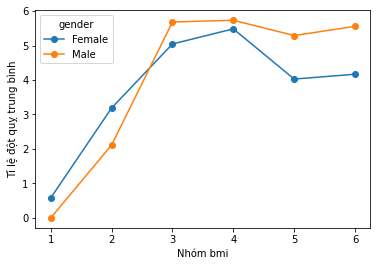

In [18]:
df_gen_bin.plot.line(marker='o')
plt.ylabel("Tỉ lệ đột quỵ trung bình")
plt.xlabel("Nhóm bmi");

Ta thấy ở giới tính nào thì chỉ số bmi cũng có quan hệ đồng biến với tỉ lệ bị đột quỵ hay nói cách khác những người bị béo phì có nguy cơ bị đột quỵ cao nhất (nhóm 3,4,5,6) còn người gầy ta thấy hiếm khi bị đột quỵ. Có vẻ những người bị béo phì bây giờ nên chú ý lại chế độ sinh hoạt ăn uống hàng ngày để giảm cân nếu không muốn có nguy cơ cao bị đột quỵ. 

Hmm, sau khi xem biểu đồ này thì 1 người gầy như mình lại hết ý định tăng cân :((

## Những người có tiền sử bệnh khác (huyết áp cao, tim mạch, đái tháo đường) thì có trung bình số ca bị đột quỵ theo từng độ tuổi là bao nhiêu?
Để trả lời câu hỏi này ta cần phải tiền xử lý dữ liệu:

- Vì chúng ta xét những người đột quỵ từ tuổi vị thành niên, nên ta lấy ra một dataframe với những người từ 12 tuổi trở lên

- Ở quá trình khám phá dữ liệu ta sẽ bỏ đi những giá trị thiếu của các cột hypertension, heart_disease, avg_glucose_level (nếu có)

- Ta chia độ tuổi thành 4 nhóm như sau:

  - 12-20: những người từ 12-20 tuổi (tuổi trẻ vị thành niên)
  - 20-25: những người từ 20-25 tuổi (tuổi trẻ)
  - 25-60: những người từ 25-60 tuổi (tuổi trưởng thành)
  - 60 tuổi trở lên: những người từ 60 tuổi trở lên (tuổi già)

- Ngoài ra thì các cột hypertension và heart_disease ta cũng chia thành 1 (người bị cao huyết áp/bệnh tim) và 0 (người không bị cao huyết áp/bệnh tim)

- Ta chia mức đường huyết (avg_glucose_level) thành 2 nhóm như sau:

  - 0-139: mức đường huyết từ 0 - 139 (người bình thường)
  - 140-199: mức đường huyết từ 140 - 199 (người bị tiền đái tháo đường)
  - 200 trở lên: mức đường huyết từ 120 trở lên (người bị bệnh đái tháo đường)

### Tiền xử lý

#### Lấy ra một dataframe mới là những người từ vị thành niên trở lên

In [19]:
new_df = df[df['age'] > 11]

In [20]:
new_df.shape

(4567, 12)

#### Bỏ các dòng  thiếu giá trị ở các cột hypertension, heart_disease và avg_glucose_level (nếu có)

In [21]:
new_df = new_df[new_df['hypertension'].notnull()]
new_df = new_df[new_df['heart_disease'].notnull()]
new_df = new_df[new_df['avg_glucose_level'].notnull()]

In [22]:
new_df.shape

(4567, 12)

#### Chia số tuổi thành 4 nhóm tuổi và lưu vào cột age_bins

In [23]:
age_bins=[12,20,25,60,85] #tuổi lớn nhất của dataframe này <85
age_labels=['12-20','20-25','25-60','> 60']
new_df['age_bin'] = pd.cut(new_df['age'],right=False,bins=age_bins,labels=age_labels)
new_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,> 60
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,> 60
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,> 60
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,25-60
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,> 60


#### Chia mức đường huyết thành 3 nhóm và lưu vào cột glu_bins

In [24]:
glu_bins=[0,140,200,500]
glu_labels=['0-139','140-199','> 200']
new_df['glu_bin'] = pd.cut(new_df['avg_glucose_level'], right=False, bins=glu_bins, labels=glu_labels)
new_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin,glu_bin
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,> 60,> 200
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,> 60,> 200
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,> 60,0-139
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,25-60,140-199
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,> 60,140-199


### Phân tích dữ liệu để trả lời câu hỏi

Để trả lời câu hỏi trên, ta cần thực hiện các bước sau:
- Bước 1: Lập 3 dataframes như sau:
    - df_hypertension: gồm 2 cột (0, 1) ứng với bị/không bị bệnh cao huyết áp, 4 dòng ứng với các nhóm được chia từ độ tuổi. Giá trị ở mỗi ô trong dataframe là trung bình số người bị đột quỵ tương ứng.
    - df_heart_disease: gồm 2 cột (0, 1) ứng với bị/không bị bệnh tim, 4 dòng ứng với các nhóm được chia từ độ tuổi. Giá trị ở mỗi ô trong dataframe là trung bình số người bị đột quỵ tương ứng.
    - df_glucose: gồm 3 cột (0, 1) ứng với bị/không bị bệnh cao huyết áp, 4 dòng ứng với các nhóm được chia từ độ tuổi. Giá trị ở mỗi ô trong dataframe là trung bình số người bị đột quỵ tương ứng.
- Bước 2: Từ kết quả trên, ta vẽ các đường dạng line trên cùng đồ thị. Trong đó trục hoành là người bị bệnh/người không bị bệnh, trục tung là trung bình số người bị đột quỵ tương ứng.

#### Code bước 1

In [25]:
df_hypertension = new_df.groupby(["age_bin","hypertension"])['stroke'].mean()*100
df_hypertension = df_hypertension.unstack(1)
df_hypertension

hypertension,0,1
age_bin,,
12-20,0.237530,0.000000
20-25,0.000000,0.000000
25-60,2.302346,6.632653
> 60,11.851852,17.905405


In [27]:
df_heart_disease = new_df.groupby(["age_bin","heart_disease"])['stroke'].mean()*100
df_heart_disease = df_heart_disease.unstack(1)
df_heart_disease

heart_disease,0,1
age_bin,,
12-20,0.236407,NaN
20-25,0.000000,NaN
25-60,2.544112,6.557377
> 60,11.876076,20.093458


In [29]:
df_glucose = new_df.groupby(["age_bin","glu_bin"])['stroke'].mean()*100
df_glucose = df_glucose.unstack(1)
df_glucose

glu_bin,0-139,140-199,> 200
age_bin,,,
12-20,0.254453,0.000000,0.000000
20-25,0.000000,0.000000,0.000000
25-60,2.093023,5.555556,6.547619
> 60,11.190965,18.620690,17.509728


#### Code bước 2

#### Biểu đồ theo bệnh huyết áp cao

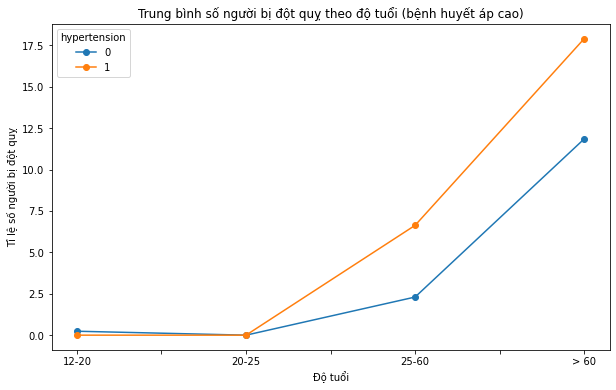

In [31]:
df_hypertension.plot.line(marker='o',figsize=(10,6), title = "Trung bình số người bị đột quỵ theo độ tuổi (bệnh huyết áp cao)")
plt.xlabel("Độ tuổi")
plt.ylabel("Tỉ lệ số người bị đột quỵ");

Khoảng từ độ tuổi 12-25 thì tỉ lệ chênh lệch là không nhiều, tức là chỉ có một vài trẻ vị thành niên bị đột quỵ, nhưng từ 20 tuổi trở đi (tuổi trẻ -> già) thì số người bị đột quỵ có bênh huyết áp cao tăng rất mạnh

#### Biểu đồ theo bệnh huyết áp cao

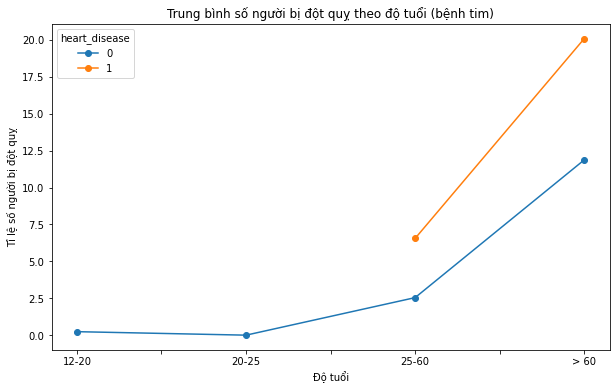

In [32]:
df_heart_disease.plot.line(marker='o',figsize=(10,6), title = "Trung bình số người bị đột quỵ theo độ tuổi (bệnh tim)")
plt.xlabel("Độ tuổi")
plt.ylabel("Tỉ lệ số người bị đột quỵ");

Một tin tốt là không có ai ở độ tuổi 12-25 mang bệnh tim bị đột quỵ, nhưng ở độ tuổi 25 trở đi (tuổi trưởng thành trở đi) thì tỉ lệ tăng mạnh không khác gì bệnh huyết áp cao

Tuy có chênh lệch về mặt số lượng nhưng cấu trúc 2 biểu đồ khá giống nhau
Tỉ lệ số người mắc bệnh huyết áp cao/tim mạch bị đột quỵ nhiều hơn tỉ lệ số người bị đột quỵ không mắc 2 loại bệnh trên. 

#### Biểu đồ theo bệnh huyết áp cao

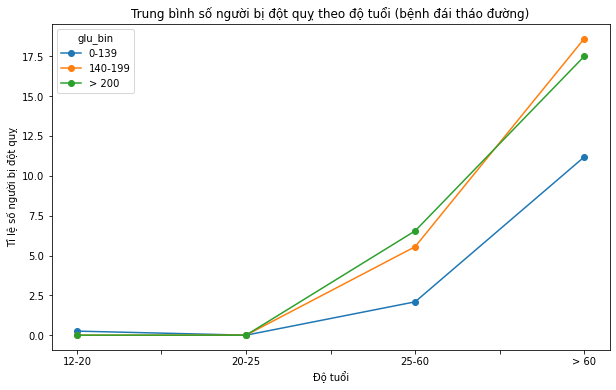

In [34]:
df_glucose.plot.line(marker='o',figsize=(10,6), title = "Trung bình số người bị đột quỵ theo độ tuổi (bệnh đái tháo đường)")
plt.xlabel("Độ tuổi")
plt.ylabel("Tỉ lệ số người bị đột quỵ");

Khoảng từ độ tuổi 12-25 thì tỉ lệ chênh lệch là không nhiều, tức là chỉ có một vài trẻ vị thành niên bị đột quỵ, nhưng từ 20 tuổi trở đi (tuổi trẻ -> già) thì số người bị đột quỵ có bệnh đái tháo đường/tiền đái tháo đường tăng rất mạnh

Ở độ tuổi 25-60 thì tỉ lệ đột quỵ tăng theo thứ tự: không bị bệnh - tiền đái tháo đường - đái tháo đường

Ở độ tuổi 25-60 thì tỉ lệ đột quỵ tăng theo thứ tự: không bị bệnh - đái tháo đường - tiền đái tháo đường, 2 đường line này chênh lêch không nhiều.

#### Ta rút ra một vài điều như sau:
- Không bất ngờ khi số lượng người bị các loại bệnh nền (huyết áp cao, tim mạch, đái tháo đường) có nhiều khả năng bị đột quỵ hơn những người bình thường, vì vậy chúng ta phải giữ sức khỏe cho bản thân chứ không chủ quan trước bất kì tình huống nào.
- Đặc biệt khả năng đột quỵ khi mắc các loại bệnh trên sẽ tăng mạnh ở độ tuổi trưởng thành trở đi, vì vậy đừng suy nghĩ rằng "còn trẻ chúng ta còn khỏe mạnh", ở độ tuổi 25 trở đi vì phải làm việc nhiều, ít thời gian chăm lo sức khỏe cũng và lý do khiến tỉ lệ đột quỵ của chúng ta tăng cao.
- Tuổi càng cao chắc chắn càng dễ bị đột quỵ hơn, đặc biệt ở tuổi già thì khả năng bị đột quỵ khi mắc các loại bệnh là rất cao.
- Mỗi biểu đồ đều có một vài người ở độ tuổi vị thành niên bị đột quỵ (không biết có phải cùng 1 người không), vì vậy có thể thấy đột quỵ là án tử bất ngờ đối với bất kì ai :-(

Không biết thức khuya có dễ bị đột quỵ hơn không, từ khi lên đại học mình thức khuya khá nhiều :"((

## 5. Cùng nhìn lại quá trình làm đồ án

### 19120328 - Võ Trọng Phú

Trong quá trình làm đồ án, em gặp một số khó khăn như:
- Khó khăn trong việc tìm dataset, phải tốn nhiều thời gian để cả nhóm tìm ra một dataset ưng ý, sau đó việc đặt câu hỏi cũng tốn kha khá thời gian, nhiều lúc đặt xong nhưng làm hơi ngắn phải đặt lại câu khác :-(
- Khó khăn về mặt thời điểm: lúc làm đồ án này là lúc diễn ra kỳ thi cuối kỳ, vừa ôn bài thi các môn khác vừa làm cũng có chút áp lực ạ, trước ngày thi thì lại kẹt các đồ án khác vì đa số thầy cô đều chốt ngày nộp trước khi thi.

Trong quá trình học môn này, em cũng gặp vài khó khăn như: 
- Ban đầu chưa quen với cách làm việc trên notebook, trước giờ chỉ code và run ở VS, VSCode; nhưng tiếp xúc dần thì thấy thích kiểu trên notebook hơn vì nó có điểm từng phần nếu không làm ra :")
- Một điều nữa không ở môn này nhưng môn nhập môn khoa học dữ liệu, vì chưa được học các thư viện trước nên lúc làm lab đầu em khá bí ạ, ước gì thầy dạy các thư viện sớm :")

Tổng kết lại, môn này rất có ích, trong quá trình học thầy cô khá vui tính và dễ tính nên em cho 5 sao trên portal :v